In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# EDA

In [2]:
data = pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.describe()   #describing data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
data.shape

(101, 18)

In [5]:
data.isnull().sum()   #null values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
data[data['animal name'].duplicated(keep=False)] ## shows Duplicate values

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [7]:
df = data.drop(index=26).reset_index(drop=True)  # reset index    # drop the multiple value of frog
df.drop('animal name',axis=1,inplace=True)

In [8]:
df.shape

(100, 17)

# Visualization

In [9]:
# Countplot

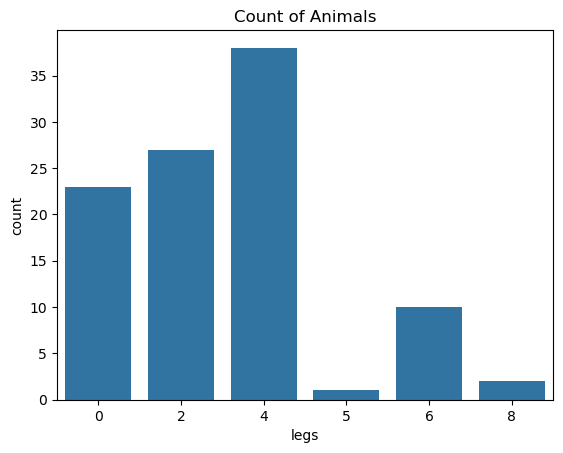

In [10]:
sns.countplot(x='legs', data=data)
plt.title('Count of Animals')
plt.show()

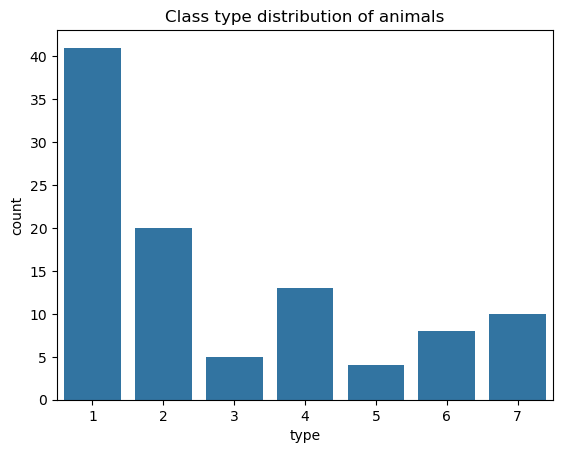

In [11]:
sns.countplot(x='type', data=data)
plt.title('Class type distribution of animals')
plt.show()

# Split the Dataset

In [12]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X = df.iloc[:,0:16]  # features
y = df.iloc[:,-1]   # result

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 16), (80,), (20, 16), (20,))

# K-Nearest Neighbors Algorithm

In [15]:
knn = KNeighborsClassifier(n_neighbors =3)  # create a KNN classifier
knn.fit(X_train, y_train)     # fit the classifier to the training data
y_pred = knn.predict(X_train)   # predict on the test data

In [16]:
confusion_matrix(y_train,y_pred)

array([[31,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [17]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        18
           3       1.00      0.50      0.67         4
           4       0.91      1.00      0.95        10
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7

    accuracy                           0.97        80
   macro avg       0.98      0.93      0.94        80
weighted avg       0.98      0.97      0.97        80



In [18]:
y_pred_test = knn.predict(X_test)
confusion_matrix(y_train,y_pred)
print(classification_report(y_test,y_pred_test,zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        20
   macro avg       0.71      0.71      0.71        20
weighted avg       0.95      0.95      0.95        20



### Model is best fit as training accurarcy 0.97 and testing accuracy is  0.95

### In summary, this classification report indicates that the model performs very well overall with high precision and recall for  most classes. Class 3 show a lower recall, which might suggest that it's harder for the model to correctly identify instances of this class compared to others.

### Class 3 poses a significant challenge for the model, as it fails to predict any instances correctly in the testing set. Class 5 was not present in the testing set, hence no predictions were made for it.

In [19]:
k_value = range(1, 31)  # Define range of k value for test
cv_score = []

for k in k_value:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv = 3, scoring='accuracy')
    cv_score.append(score.mean())

In [20]:
# Determine best k value
best = k_value[np.argmax(cv_score)]
print(f'Best k: {best}')

Best k: 1


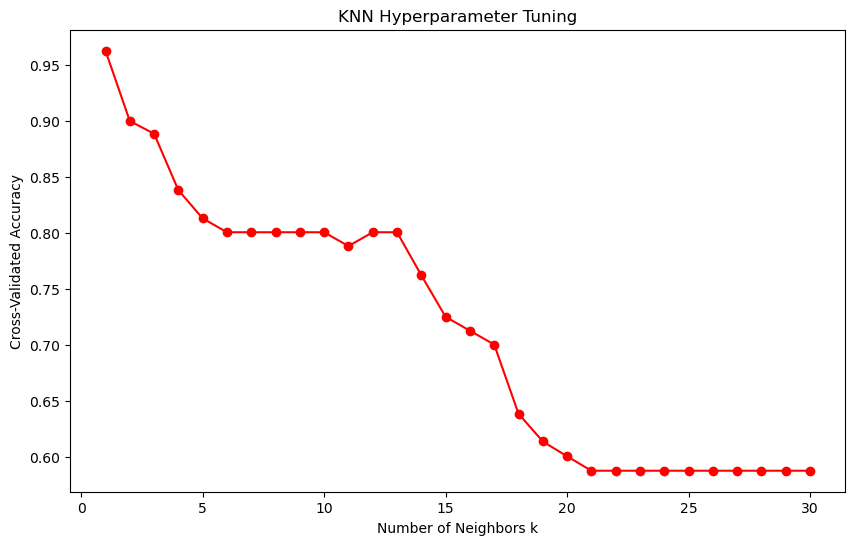

In [21]:
# plot the result
plt.figure(figsize=(10, 6))
plt.plot(k_value, cv_score, marker = 'o', c='red')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

In [22]:
# Evaluate the model with the best k on the test set
best_knn = KNeighborsClassifier(n_neighbors=best)
best_knn.fit(X_train, y_train)
test_accuracy = best_knn.score(X_train, y_train)
print(f'Test accuracy with best k ({best}): {test_accuracy}')

Test accuracy with best k (1): 1.0


# Visualize Decision Boundaries

In [23]:
# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
Xpca_train = pca.fit_transform(X_train)

In [24]:
# Initialize kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xpca_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
# Plotting decision regions
h = .02  # step size in the mesh
x_min, x_max = Xpca_train[:, 0].min() - 1, Xpca_train[:, 0].max() + 1
y_min, y_max = Xpca_train[:, 1].min() - 1, Xpca_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [26]:
# Predicting on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

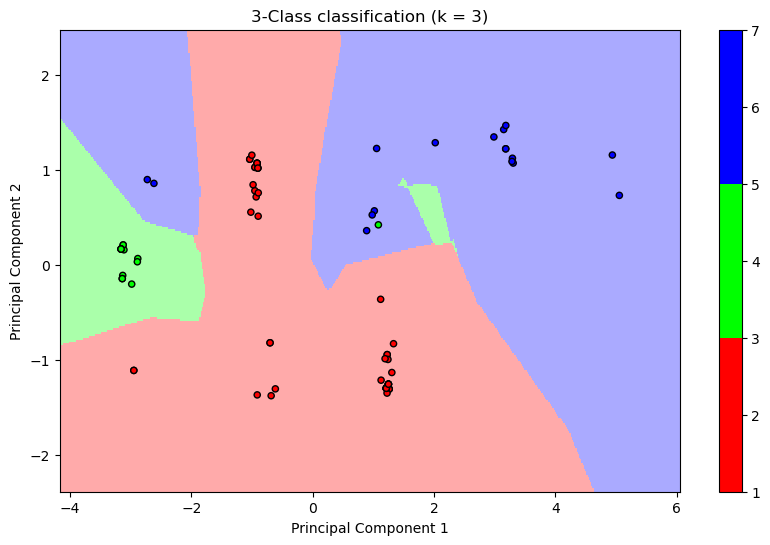

In [27]:
# Create a color plot with decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(Xpca_train[:, 0], Xpca_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.colorbar()
plt.title("3-Class classification (k = 3)")
plt.show()

# Interview Questions:

### 1. What are the key hyperparameters in KNN?

k: The number of nearest neighbors to consider. A smaller value of k can be sensitive to noise, while a larger k can smooth out predictions.

Distance Metric: The method used to calculate the distance between data points, commonly Euclidean distance, Manhattan distance, or Minkowski distance.

Weights: Determines how much influence each neighbor has on the prediction. Options include uniform weights (all neighbors contribute equally) or distance-based weights (closer neighbors have more influence).

### 2. What distance metrics can be used in KNN?

Euclidean Distance: The most common metric, calculating the straight-line distance between two points.
Manhattan Distance: Measures distance by summing the absolute differences along each dimension.
Minkowski Distance: A generalized distance metric that includes Euclidean and Manhattan as special cases (controlled by the parameter p).